# Data exploration

In [1]:
import pandas as pd

## Abwasserverband AIZ

In [2]:
# CAVE: Umbauphase 2020 ARA Strass daher kein Vergleich mit den Daten aus den Vorjahren!
years = [2018, 2019, 2020]

### Faulung

In [3]:
faulung = pd.concat([pd.read_excel(f'../assets/data/raw/Faulung-{year}.xlsx', skiprows=1, skipfooter=6) for year in years], ignore_index=True)
faulung.describe().T

count          mean  \
Rohs. FB-1 [m³]                               1096.0     87.603766   
Rohs. FB-2 [m³]                               1096.0     99.211796   
Rohs. gesamt [m³]                             1096.0    186.815562   
TS Rohschlamm [g/l]                            740.0     55.172162   
Rohs. TS-Fracht [kg/d]                         740.0  10375.156372   
Rohs. oTS-Fracht [kg/d]                        302.0   7826.194743   
Faulschlamm1 Menge [m³]                       1096.0     83.422511   
Faulschlamm2 Menge [m³]                       1096.0     92.545752   
Faulschlamm Menge [m³]                        1096.0    175.968263   
Faulbehälter1 Temperatur [°C]                 1096.0     38.466341   
Faulbehälter2 Temperatur [°C]                 1096.0     38.619407   
Faulschlamm1 pH-Wert [-]                      1096.0      7.530465   
Faulschlamm2 pH-Wert [-]                      1096.0      7.492582   
Faulbehälter Faulzeit [d]                     1096.0     28.075367   
TS Faulschlamm [g/l]                           744.0     30.307245   
Faulschlamm TS-Fracht [kg/d]                   744.0   5355.923394   
Faulbehälter Feststoffbelastung [kg/(m³.d)]    740.0      2.075031   
GV Faulschlamm [%]                             314.0     59.647404   
Faulschlamm oTS-Fracht [kg/d]                  309.0   3156.064620   
Kofermentation Bioabfälle [m³]                1096.0     14.280474   
Kofermentation CSB-Fracht [kg]                   0.0           NaN   

                                                      std          min  \
Rohs. FB-1 [m³]                                 33.379816     0.000000   
Rohs. FB-2 [m³]                                 30.610972     0.000000   
Rohs. gesamt [m³]                               39.977941    88.992000   
TS Rohschlamm [g/l]                              8.973793    27.900000   
Rohs. TS-Fracht [kg/d]                        2843.556603  4441.651200   
Rohs. oTS-Fracht [kg/d]                       2152.609835  3779.275968   
Faulschlamm1 Menge [m³]                         29.545097     2.592000   
Faulschlamm2 Menge [m³]                         32.325536     1.728000   
Faulschlamm Menge [m³]                          44.534881    45.792000   
Faulbehälter1 Temperatur [°C]                    0.613712    32.620000   
Faulbehälter2 Temperatur [°C]                    0.391865    36.090000   
Faulschlamm1 pH-Wert [-]                         0.414064     6.750000   
Faulschlamm2 pH-Wert [-]                         0.328394     6.910000   
Faulbehälter Faulzeit [d]                        6.355536    17.378490   
TS Faulschlamm [g/l]                             3.896017    22.000000   
Faulschlamm TS-Fracht [kg/d]                  1531.134246  1625.702400   
Faulbehälter Feststoffbelastung [kg/(m³.d)]      0.568711     0.888330   
GV Faulschlamm [%]                               2.489243    51.550000   
Faulschlamm oTS-Fracht [kg/d]                  919.403230   953.474458   
Kofermentation Bioabfälle [m³]                  11.132647     0.000000   
Kofermentation CSB-Fracht [kg]                        NaN          NaN   

                                                      25%          50%  \
Rohs. FB-1 [m³]                                 74.304000    91.584000   
Rohs. FB-2 [m³]                                 78.624000    94.176000   
Rohs. gesamt [m³]                              155.520000   184.896000   
TS Rohschlamm [g/l]                             50.500000    55.300000   
Rohs. TS-Fracht [kg/d]                        8242.344000  9915.609600   
Rohs. oTS-Fracht [kg/d]                       6321.237905  7371.189562   
Faulschlamm1 Menge [m³]                         69.984000    84.672000   
Faulschlamm2 Menge [m³]                         70.848000    88.992000   
Faulschlamm Menge [m³]                         145.152000   173.664000   
Faulbehälter1 Temperatur [°C]                   38.320000    38.690000   
Faulbehälter2 Temperatur [°C]                   38.620000    38

In [4]:
faulung.isna().sum()

Datum                                              0
Rohs. FB-1 [m³]                                    0
Rohs. FB-2 [m³]                                    0
Rohs. gesamt [m³]                                  0
TS Rohschlamm [g/l]                              356
Rohs. TS-Fracht [kg/d]                           356
Rohs. oTS-Fracht [kg/d]                          794
Faulschlamm1 Menge [m³]                            0
Faulschlamm2 Menge [m³]                            0
Faulschlamm Menge [m³]                             0
Faulbehälter1 Temperatur [°C]                      0
Faulbehälter2 Temperatur [°C]                      0
Faulschlamm1 pH-Wert [-]                           0
Faulschlamm2 pH-Wert [-]                           0
Faulbehälter Faulzeit [d]                          0
TS Faulschlamm [g/l]                             352
Faulschlamm TS-Fracht [kg/d]                     352
Faulbehälter Feststoffbelastung [kg/(m³.d)]      356
GV Faulschlamm [%]                            

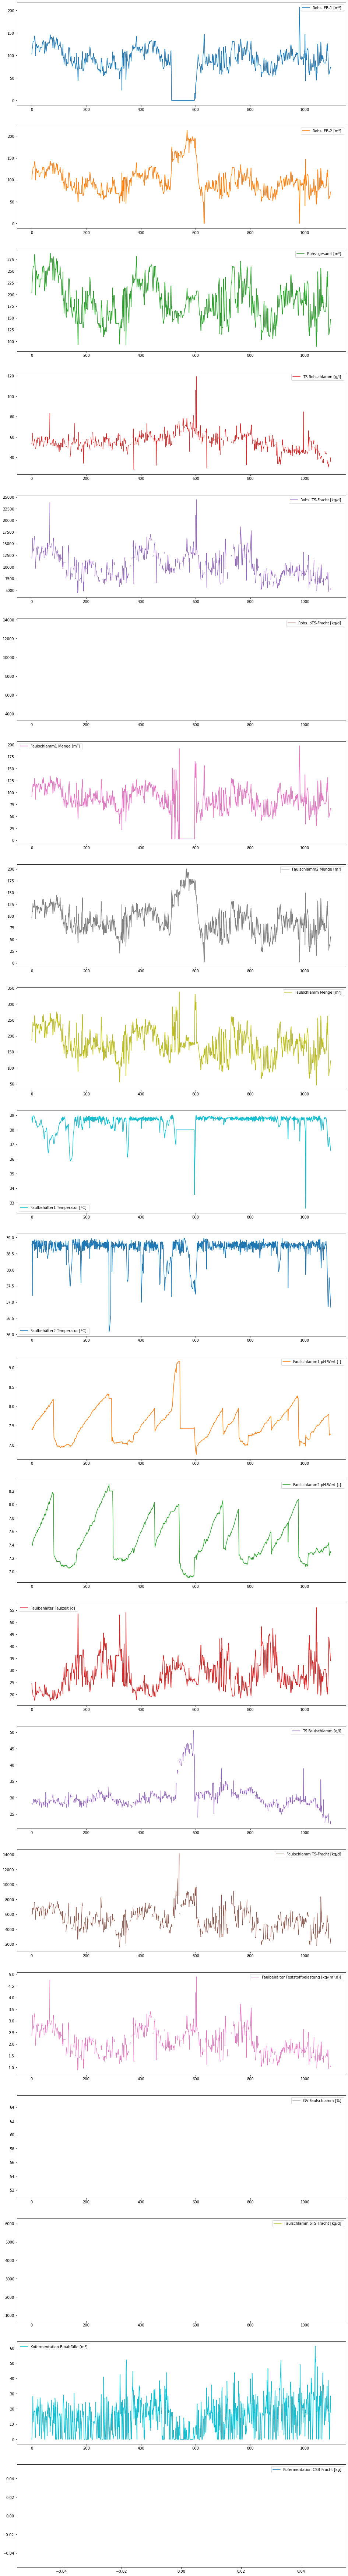

In [5]:
faulung.plot(subplots=True, sharex=False, figsize=(16,128));

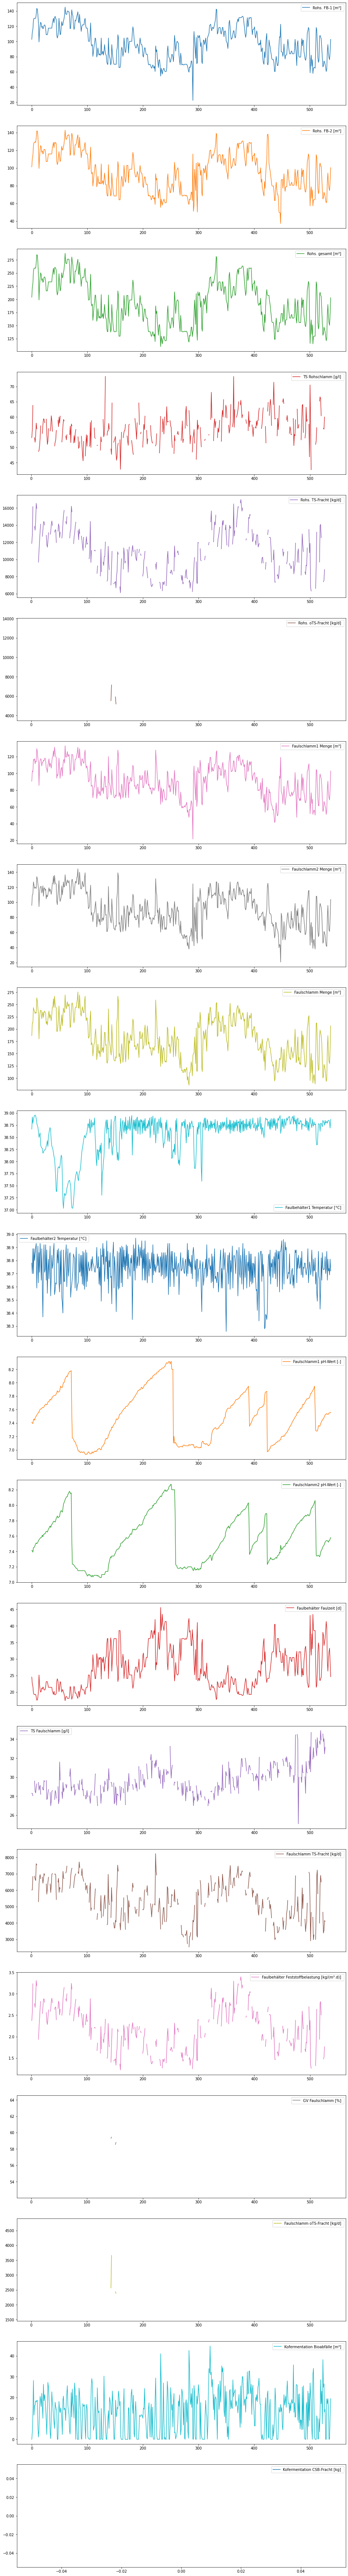

In [5]:
# Treat outliers wrt. IQR by removing them.
q1 = faulung.quantile(.25)
q3 = faulung.quantile(.75)
iqr = q3-q1
faulung_clean = faulung[~((faulung < (q1 - 1.5 * iqr)) | (faulung > (q3 + 1.5 * iqr))).any(axis=1)]
faulung_clean.plot(subplots=True, sharex=False, figsize=(16,128), use_index=False);

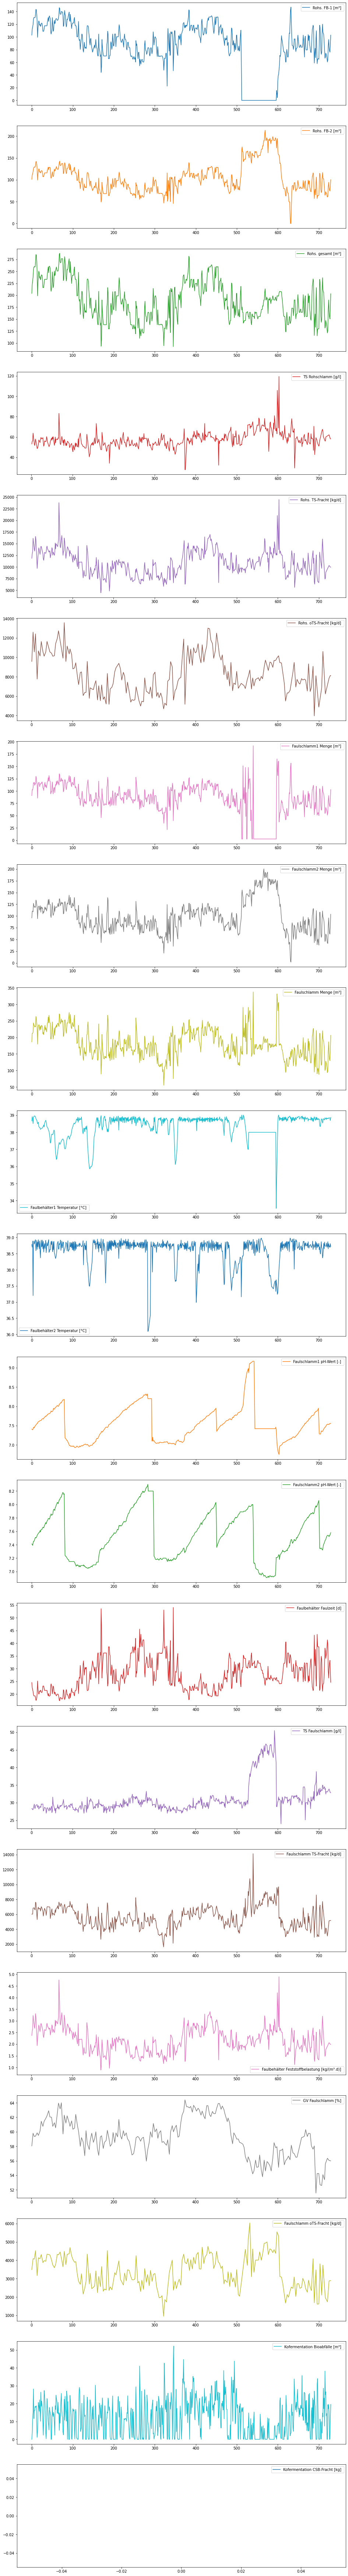

In [6]:
# Interpolate missing values linearily.
faulung.interpolate(method="linear").plot(subplots=True, sharex=False, figsize=(16,128));

### Faulgas

In [6]:
faulgas = pd.concat([pd.read_excel(f"../assets/data/raw/Faulgas-{year}.xlsx", skiprows=1, skipfooter=6) for year in years], ignore_index=True)
faulgas.describe().T

count         mean  \
Faulgas1 Menge [Nm³]                                1096.0  2276.595584   
Faulgas2 Menge [Nm³]                                1096.0  2606.682993   
Faulgas Menge [Nm³]                                 1096.0  4883.278577   
Methan Menge [Nm³]                                  1095.0   714.802548   
Faulgas zur BARA [Nm³]                              1095.0  1277.251005   
Schwachgas von BARA [Nm³]                           1095.0   562.448458   
Faulgas CO2-Gehalt [%]                              1096.0    37.378266   
CO2 FB-1 [%]                                        1096.0    37.365940   
CO2 FB-2 [%]                                        1096.0    37.390593   
Faulgas CH4-Gehalt [%]                              1096.0    62.621734   
CH4 FB-1 [%]                                        1096.0    62.634060   
CH4 FB-2 [%]                                        1096.0    62.609407   
Faulgas CH4-Gehalt [%] .1                           1096.0    58.157938   
Faulgas H2S-Gehalt [ppm]                            1096.0    41.304758   
H2S FB-1 [ppm]                                      1096.0    37.487454   
H2S FB-2 [ppm]                                      1096.0    45.122062   
Faulgas H2-Gehalt [%]                               1096.0    39.402701   
H2 FB-1 [%]                                         1096.0    39.682819   
H2 FB-2 [%]                                         1096.0    39.122582   
Faulgas H2S-Gehalt [ppm] .1                         1096.0    56.149964   
Faulgas BHKW [Nm³]                                  1096.0  4555.568978   
Faulgas GM1-208 [Nm³]                               1096.0  2974.410438   
Faulgas GM2-312 [Nm³]                               1096.0  1581.158540   
Faulgas Heizung [Nm³]                               1096.0     0.006569   
FB Eisen Dosiermenge [l]                            1096.0    96.086679   
FB Eisen Einkauf [kg]                                  0.0          NaN   
spez. Faulgasanfall je EW-CSB120 [l/EW/d]           1096.0    37.659277   
spez. Faulgasanfall je org. Feststofffracht [l/...   302.0   626.798980   

                                                            std          min  \
Faulgas1 Menge [Nm³]                                1005.170521     0.000000   
Faulgas2 Menge [Nm³]                                 812.566798     0.000000   
Faulgas Menge [Nm³]                                 1283.972007  1506.480000   
Methan Menge [Nm³]                                   533.112069     0.000000   
Faulgas zur BARA [Nm³]                               968.734545     0.000000   
Schwachgas von BARA [Nm³]                            437.089911     0.000000   
Faulgas CO2-Gehalt [%]                                 1.801797    27.925000   
CO2 FB-1 [%]                                           2.053451    17.960000   
CO2 FB-2 [%]                                           1.739953    34.130000   
Faulgas CH4-Gehalt [%]                                 1.801797    33.140000   
CH4 FB-1 [%]                                           2.053451    32.950000   
CH4 FB-2 [%]                                           1.739953    33.330000   
Faulgas CH4-Gehalt [%] .1                              3.677882    35.830000   
Faulgas H2S-Gehalt [ppm]                              21.126783     0.000000   
H2S FB-1 [ppm]                                        27.555175     0.000000   
H2S FB-2 [ppm]                                        24.928428     0.000000   
Faulgas H2-Gehalt [%]                                 18.141676     0.000000   
H2 FB-1 [%]                                           22.124713     0.000000   
H2 FB-2 [%]                                           16.934697     0.000000   
Faulgas H2S-Gehalt [ppm] .1                           23.764905     0.000000   
Faulgas BHKW [Nm³]                                   987.344448  1310.640000   
Faulgas GM1-208 [Nm³]                               2089.175182    -0.240000   
Faulgas GM2-312 [Nm³]                

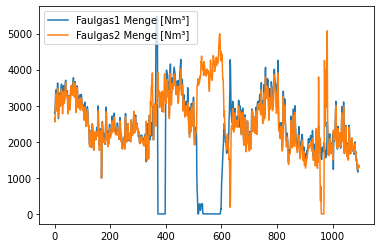

In [7]:
faulgas.plot(y=["Faulgas1 Menge [Nm³] ", "Faulgas2 Menge [Nm³] "]);

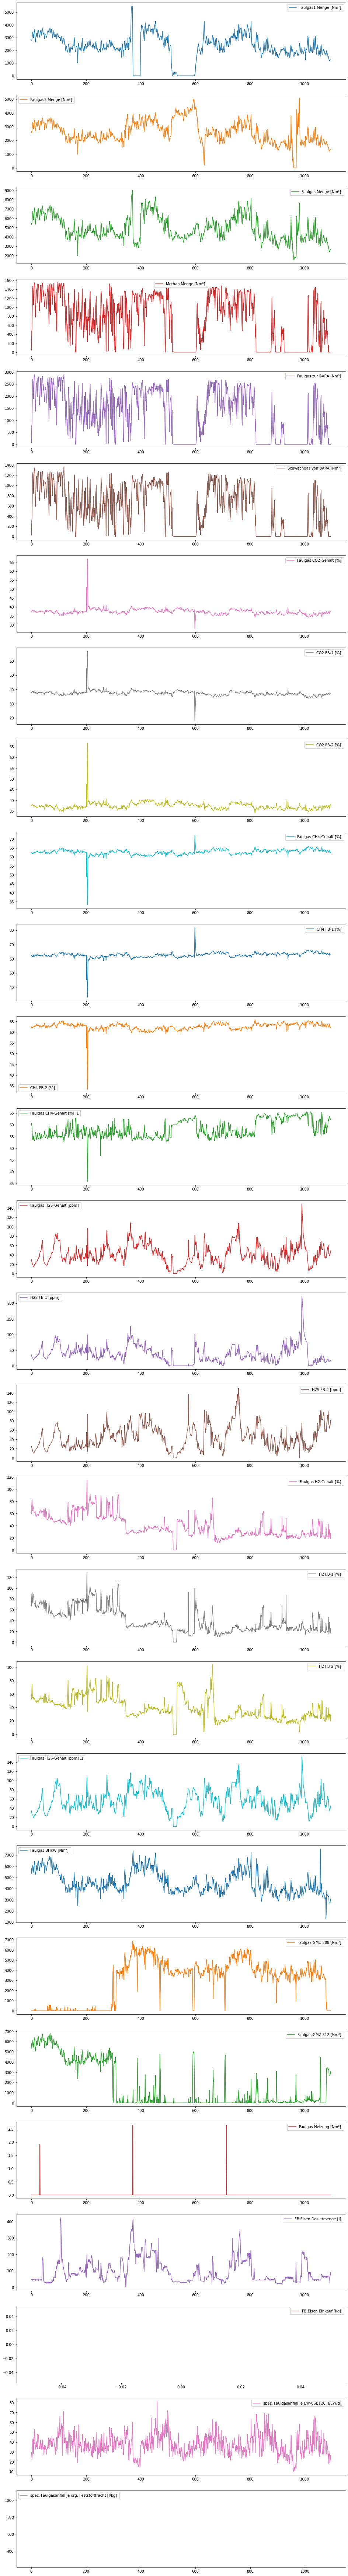

In [8]:
faulgas.plot(subplots=True, sharex=False, figsize=(16, 128));

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

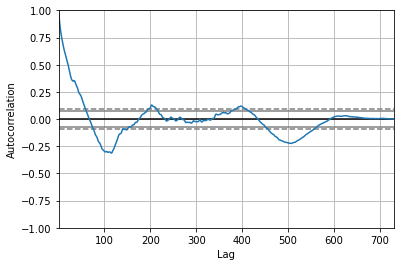

In [10]:
digester = 1
# faulgas.loc[:, f"Faulgas{digester} Menge [Nm³] "].rolling(window=8).std().plot()
pd.plotting.autocorrelation_plot(faulgas.loc[:, f"Faulgas{digester} Menge [Nm³] "])

## IKB

In [16]:
df = pd.read_excel(f'../assets/data/raw/Daten Faulung ARA Innsbruck {years[1]}.xlsx', skiprows=5)
df.describe()

pH FT1 EP;  [-]; {AR22-00083}#4  \
count                       239.000000   
mean                          7.165481   
std                           0.162756   
min                           6.700000   
25%                           7.100000   
50%                           7.200000   
75%                           7.280000   
max                           7.520000   

       Mittlere Temp.FT1 [°C]; {AR00-03001}#1  \
count                              365.000000   
mean                                37.213678   
std                                  0.319582   
min                                 36.246800   
25%                                 37.000200   
50%                                 37.270100   
75%                                 37.466100   
max                                 37.786800   

       TS FT1 EP;  [%]; {AR22-00084}#4  FT1 Q-Müse(1); [m³]; {AR21-00069}#2  \
count                       239.000000                           364.000000   
mean                          3.287364                           124.381868   
std                           0.408880                            86.963149   
min                           2.230000                             0.000000   
25%                           3.040000                            52.750000   
50%                           3.210000                           132.000000   
75%                           3.560000                           186.250000   
max                           4.310000                           388.000000   

       FT1 Q-PriS(1); [m³]; {AR21-00068}#2  \
count                           362.000000   
mean                            114.875691   
std                              39.846986   
min                               0.000000   
25%                              95.000000   
50%                             121.500000   
75%                             141.000000   
max                             227.000000   

       Q-BioAbfall FT1  [m³]; {AR21-00082}#2  \
count                             362.000000   
mean                               73.486188   
std                                45.195740   
min                                 0.000000   
25%                                46.250000   
50%                                78.000000   
75%                                87.000000   
max                               195.000000   

       FT2 Q-Müse(2); [m³]; {AR21-00072}#2  \
count                           362.000000   
mean                             36.751381   
std                              86.846692   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               0.000000   
max                             398.000000   

       FT2 Q-PrimS(2); [m³]; {AR21-00071}#2  \
count                            364.000000   
mean                               2.947802   
std                               18.418760   
min                                0.000000   
25%                                0.000000   
50%                                0.000000   
75%                                0.000000   
max                              169.000000   

       Q-BioAbfall FT2  [m³]; {AR21-00083}#2  pH FT2 EP;  [-]; {AR22-00087}#4  \
count                             364.000000                       239.000000   
mean                                1.604396                         7.261297   
std                                14.313976                         0.171620   
min                                 0.000000                         6.650000   
25%                                 0.000000                         7.165000   
50%                                 0.000000                         7.310000   
75%                                 0.000000                         7.380000   
max                               157.000000                         7.580000   

       Mittlere Temp.FT2 [°C]; {AR00-03002}#1  TS FT2 EP;

In [ ]:
df.isna().sum()